<h1><center>Procesos Estocásticos </center></h1>

# Práctica I:  Caminata aleatoria Simple

La caminata aleatoria en $\mathbb{Z}$, es la más simple de todas, de ahí su nombre. $X_1$ toma valores en $\{−1,1\}$, y la caminata comienza en $S_n = 0$ y está definida para valores enteros. Las probabilidades se denotan como:
\begin{equation*}
P(X_1=1)=P(X_1=−1)=1/2
\end{equation*}
Considerando el caso más general, se tiene que
\begin{equation*}
P(X_1=1)=p \text{  y  }  P(X_1=−1)=1−p
\end{equation*}

<img src='caminata2.png'>

Vamos a definir a $S_n$ como la suma que toma la caminata al paso $n$ de la siguiente manera

\begin{equation}
Sn = S_{n-1} + X_n, \ \ n \geq 1, \ \ S_0=0
\end{equation}

Por ejemplo, la posición al efectuar el movimiento $1$ es:
$$S_1 = S_0 + X_1 = 0 + 1 = 1 $$

Por ejemplo, la posición al efectuar el movimiento $2$ es:
$$S_2 = S_1 + X_2 = 1 + (-1) = 0 $$

La posición a $n$ pasos puede definirse como

\begin{equation}
S_n  =  \sum_{i=1}^n X_i
\end{equation}

# Simulación de una caminata aleatoria

In [20]:
# function para simular una caminata aleatoria
caminata.aleatoria.simple <- function(n.pasos, n.trajectorias, prob.r=0.5){
  # Inputs:  
  #     n.pasos         : numero de pasos realizados.  
  #     n.trajectorias  : número de trjectorias.  
  #     prob            : probabilidad de ir a la derecha.
  # Outputs:
  #     matriz          : data.frame donde las columnas indican el número de pasos y las filas el número de trajectorias
  
  # definimos movimiento
  x.right = 1
  x.left = -1
 
  
  Sn_mat <- matrix(0, ncol=n.pasos+1, nrow=n.trajectorias)
  
  for(i in 1:n.trajectorias){
    for(j in 2:(n.pasos + 1)){
      step <- sample(c(x.left,x.right),1,prob=c(1-prob.r,prob.r),replace=F)
      Sn_mat[i,j] <- Sn_mat[i,j-1] + step  
    }
  }

  # data frame
  result_df <- data.frame('traject'=sapply(1:n.trajectorias, function(i) paste('traject',i,sep='')),
                          'Sn'=Sn_mat)
  
  return(result_df)
}

## Simulation:

In [21]:
library("tidyverse")
library("ggplot2")
library("plotly")
options(repr.plot.width=16, repr.plot.height=8)

## Ejemplo 1: Una trajectoria de la caminata aleatoría

In [34]:
#######  Ejemplo:
n.pasos <- 10000        # numero de pasos
n.trajectorias <- 1     # nnumero de trajectorias
prob.r <- 0.5           # probabilidad de ir hacia la derecha [0, 1]

In [35]:
# sumulación
df <- caminata.aleatoria.simple(n.pasos, n.trajectorias, prob.r)
head(df)


,traject,Sn.1,Sn.2,Sn.3,Sn.4,Sn.5,Sn.6,Sn.7,Sn.8,Sn.9,...,Sn.9992,Sn.9993,Sn.9994,Sn.9995,Sn.9996,Sn.9997,Sn.9998,Sn.9999,Sn.10000,Sn.10001
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,traject1,0,-1,-2,-3,-4,-5,-4,-3,-2,...,-5,-4,-5,-6,-5,-6,-5,-6,-5,-6


In [38]:
##  Gráfico de trayectorias
df_rw <- df  %>%
  gather(key='t',value='valor',-traject) %>%
  mutate(t = as.numeric(substring(t,4,10))) %>%
  arrange(traject)
head(df_rw)

,traject,t,valor
,<chr>,<dbl>,<dbl>
1,traject1,1,0
2,traject1,2,-1
3,traject1,3,-2
4,traject1,4,-3
5,traject1,5,-4
6,traject1,6,-5


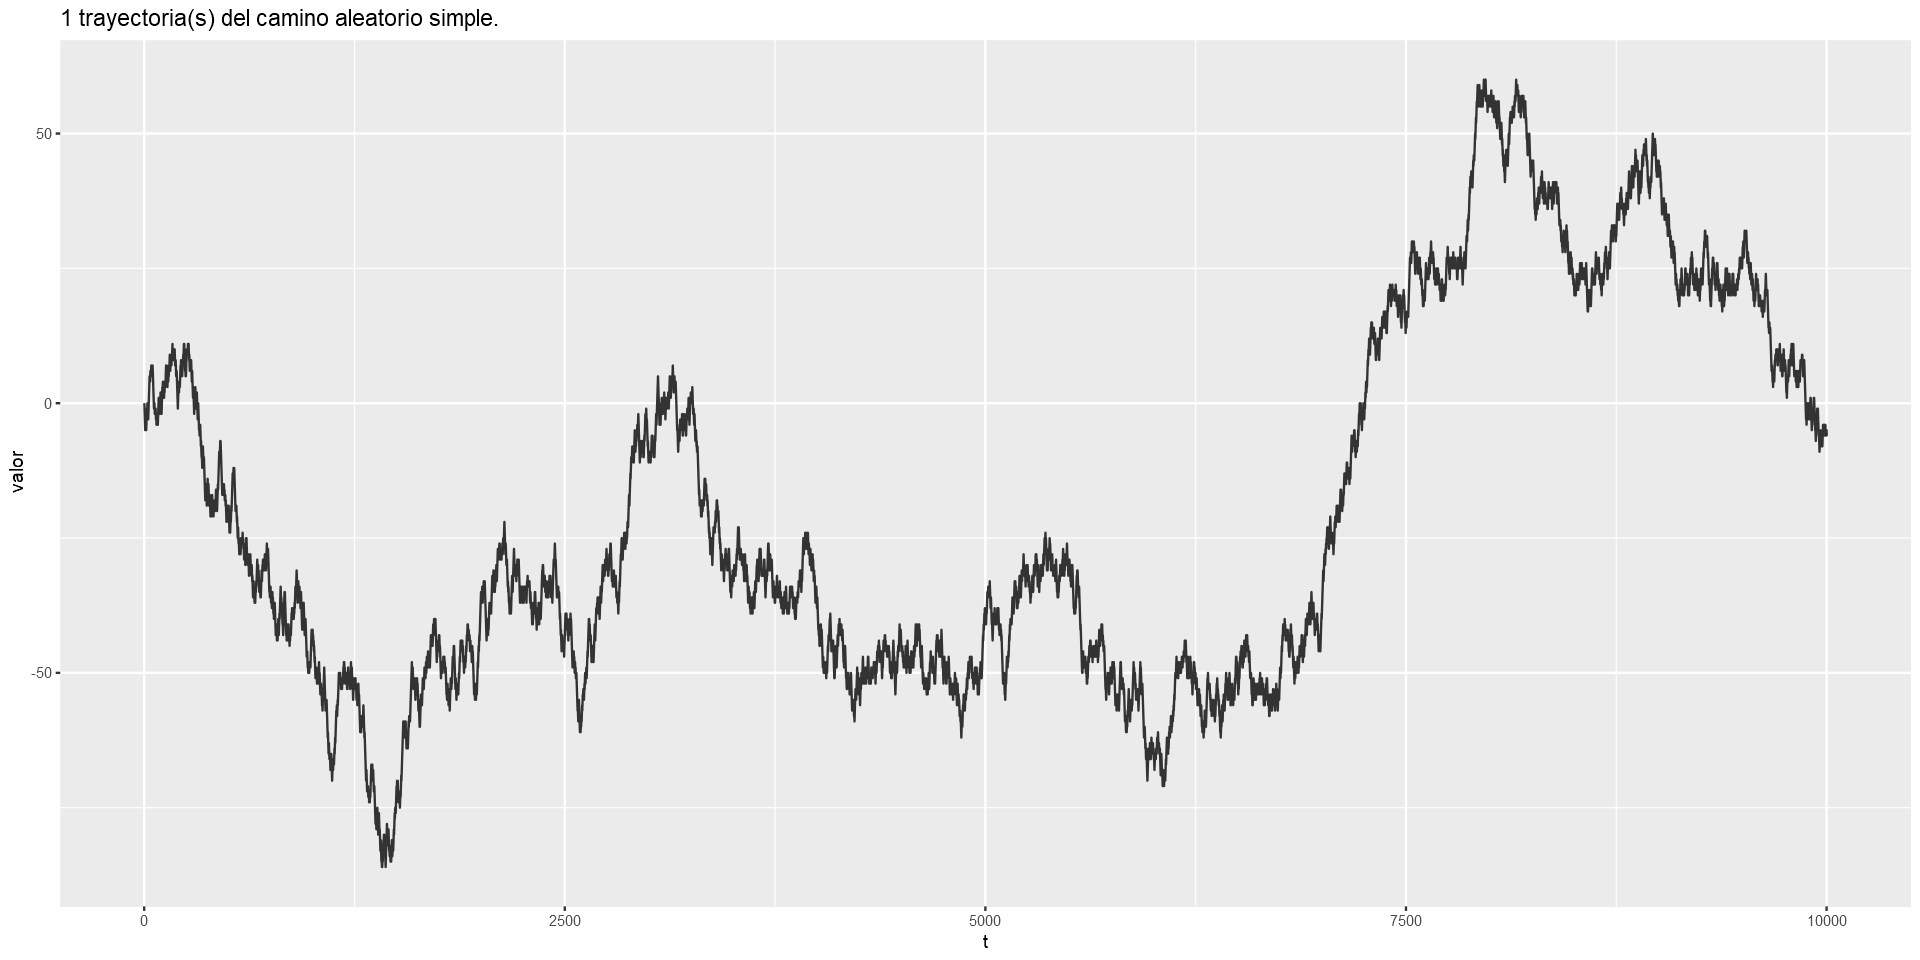

In [39]:
# gráfico de trajectorias
p1 <- ggplot(df_rw,aes(x=t,y=valor,color=traject)) +
  geom_line() +
  scale_colour_grey(start = 0.2,end = 0.6) +
  theme(legend.position="none") +
  ggtitle(paste(n.trajectorias," trayectoria(s) de la caminata aleatoria simple.",sep=''))
p1

## Ejemplo 2: 10000 trajectoria de la caminata aleatoría simple

In [55]:
#######  Ejemplo:
n.pasos <- 10000           # numero de pasos
n.trajectorias <- 1000     # nnumero de trajectorias
prob.r <- 0.5              # probabilidad de ir hacia la derecha [0, 1]

In [56]:
# sumulación
df <- caminata.aleatoria.simple(n.pasos, n.trajectorias, prob.r)

##  Gráfico de trayectorias
df_rw <- df  %>%
  gather(key='t',value='valor',-traject) %>%
  mutate(t = as.numeric(substring(t,4,10))) %>%
  arrange(traject)

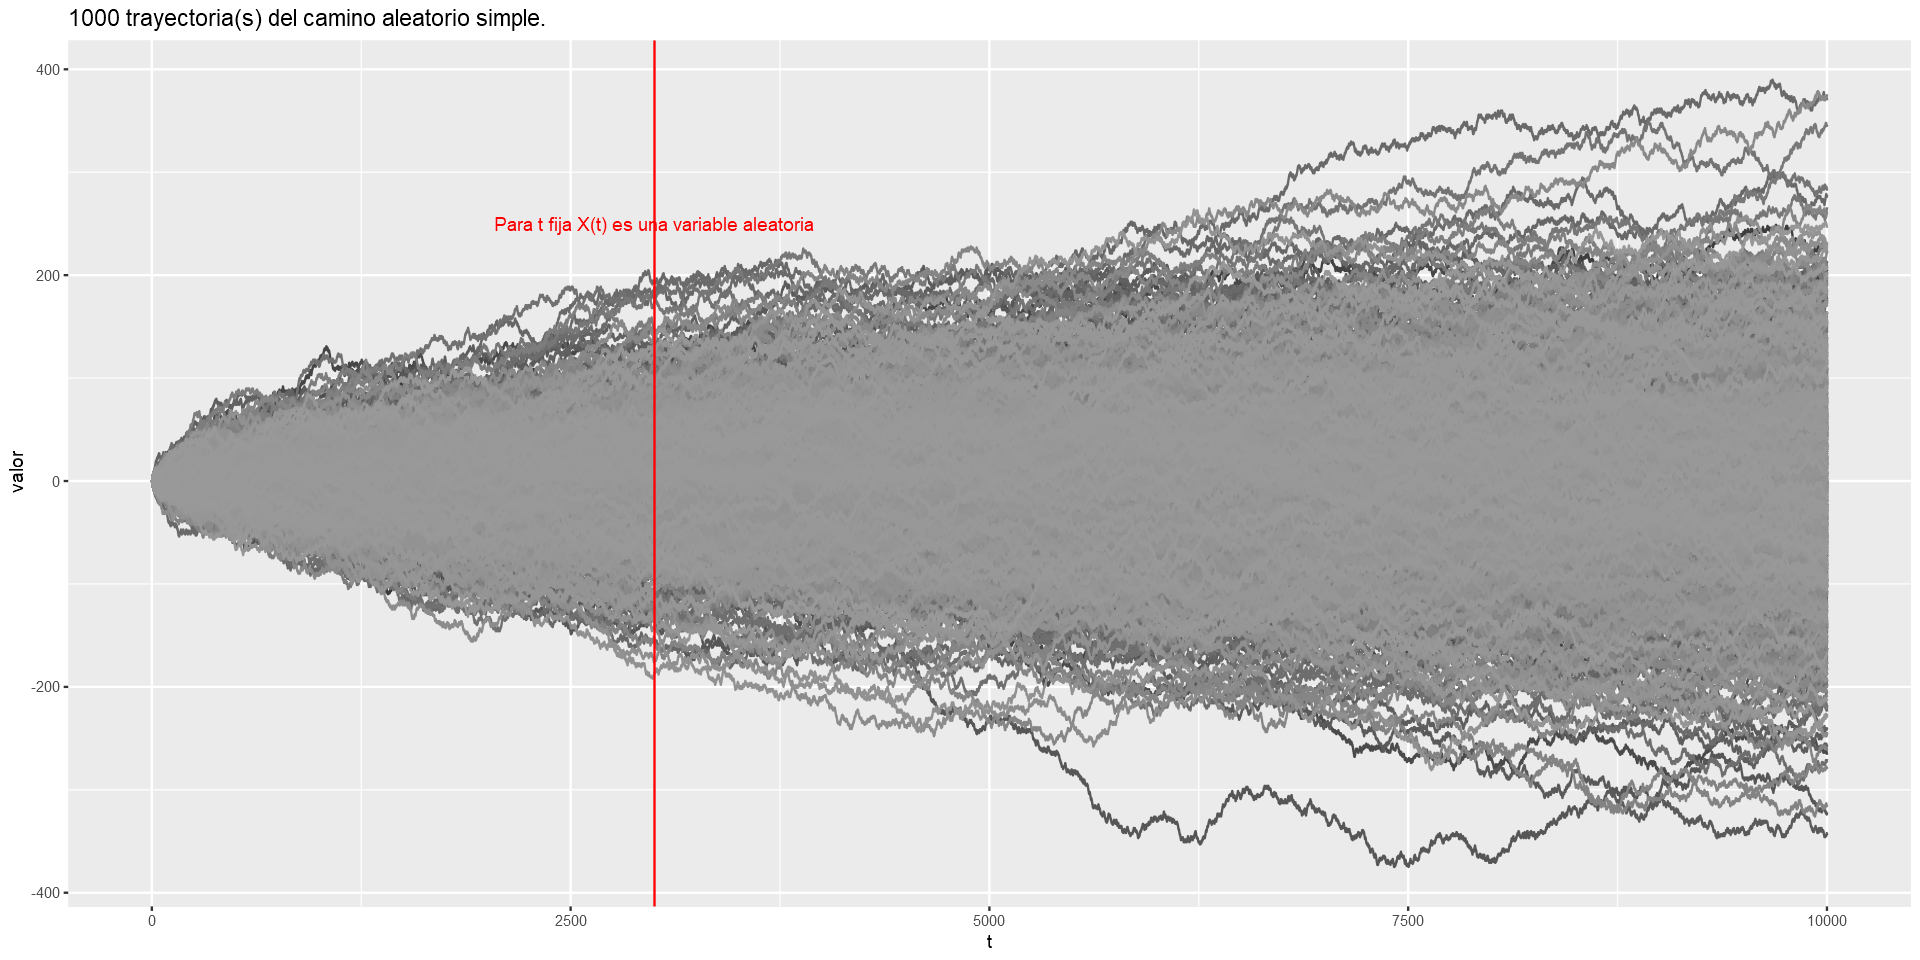

In [57]:
# gráfico de trajectorias
p1 <- ggplot(df_rw,aes(x=t,y=valor,color=traject)) +
  geom_line() +
  scale_colour_grey(start = 0.2,end = 0.6) +
  theme(legend.position="none") +
  ggtitle(paste(n.trajectorias," trayectoria(s) del camino aleatorio simple.",sep='')) +
  geom_vline(xintercept = 3000, col='red') +
  annotate(geom="text", x=3000, y=250, label="Para t fija X(t) es una variable aleatoria", color="red")
p1

Ahora vamos a obtener la distribución para distintos valores de $t$.

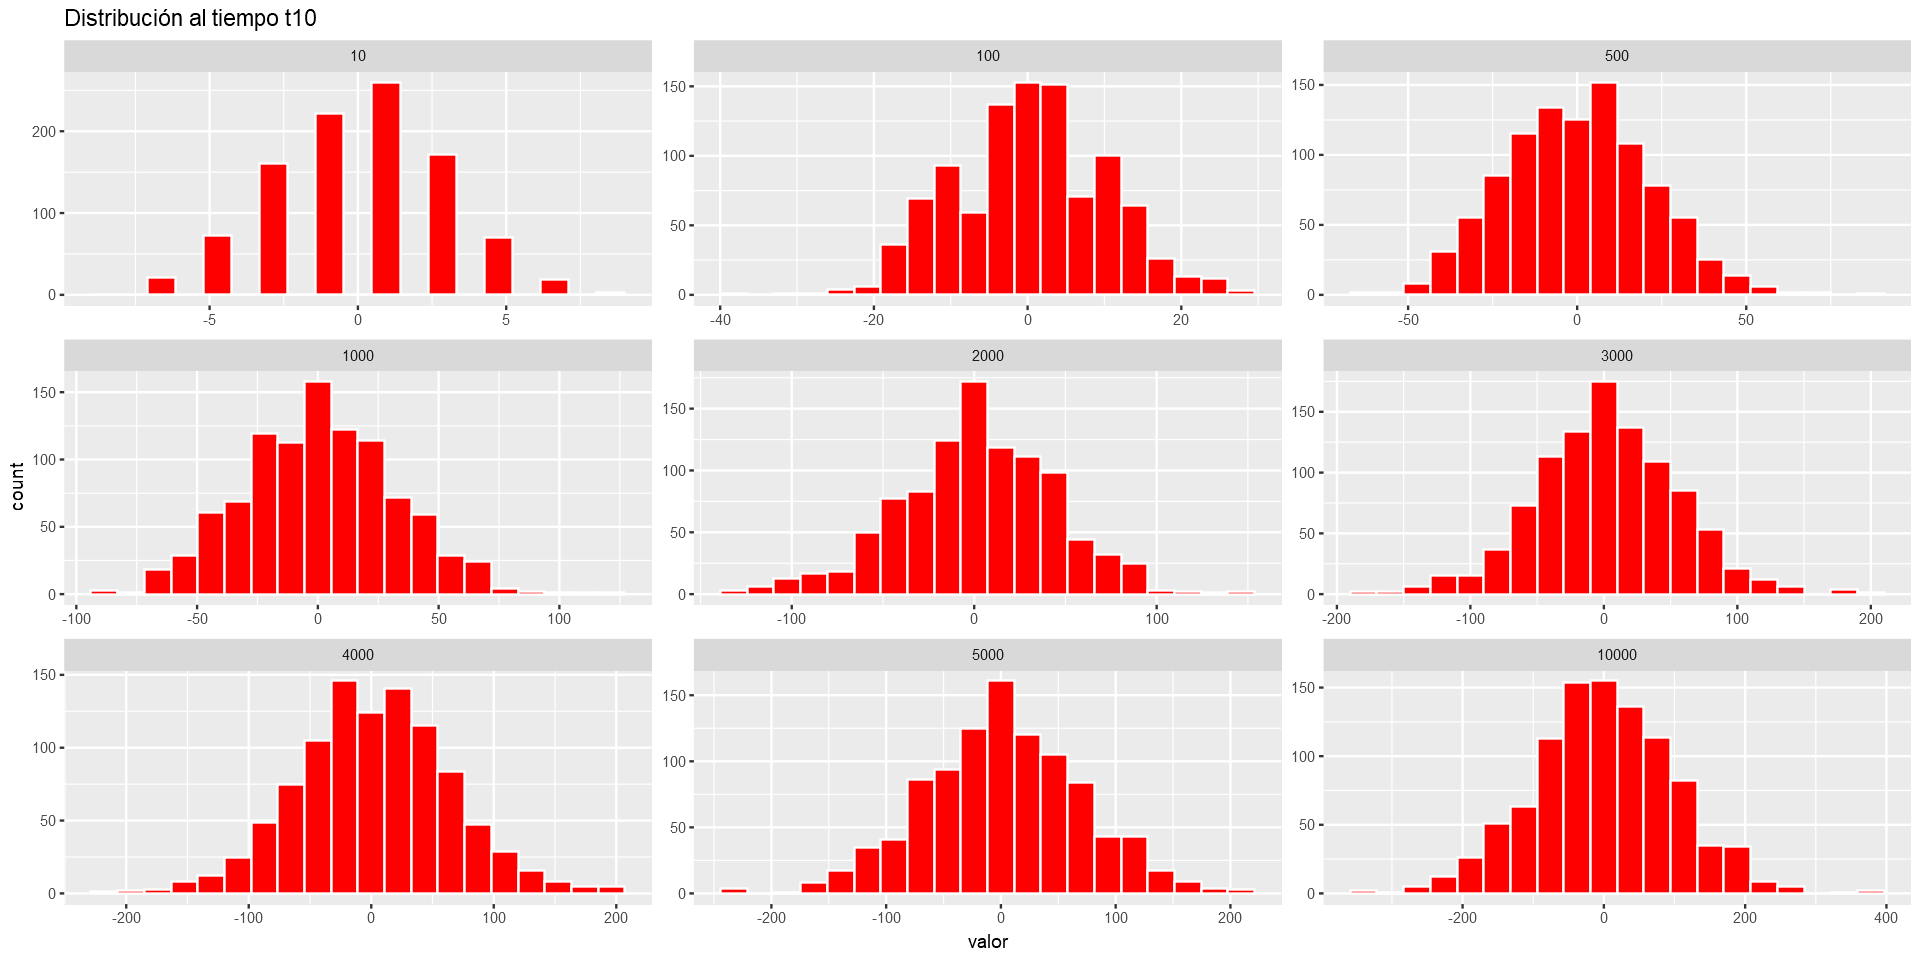

In [58]:
## Distribución al tiempo t
t.selected <- c(10, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000)

df_dist <- df_rw %>% filter(t %in% t.selected)

p2 <- ggplot(df_dist,aes(valor)) +
  geom_histogram(bins=20, fill='red', col="white") +
  ggtitle(paste("Distribución al tiempo t", t.selected,sep=""))+ 
  facet_wrap(vars(t),scale="free") +
  theme(legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
        scale_color_grey(start=0.65, end=0.8)
p2  

## Caminata aleatoria en dos dimensiones

In [62]:
## Caminata simple en dos dimensiones

randomWalk2d_plot <- function(base, n.pasos){
  df <- base
  
  df_2d <- df  %>%
    gather(key='t',value='valor',-traject) %>%
    filter(traject == 'traject1' | traject=='traject2') %>%
    spread(traject, valor)  %>%
    mutate(t = as.numeric(substring(t,4,10))) %>%
    arrange(t) %>%
    filter(t <= n.pasos)
  
  b2 <- ggplot(df_2d,aes(x=traject1,y=traject2))+
    geom_point(color="blue") +
    geom_point(df_2d%>%filter(t == 1),mapping=aes(x=traject1,y=traject2),color="green", size=3) +
    geom_point(df_2d%>%filter(t == max(t)),mapping=aes(x=traject1,y=traject2),color="red", size=3) +
    geom_path()
  b2
  return(b2)
}

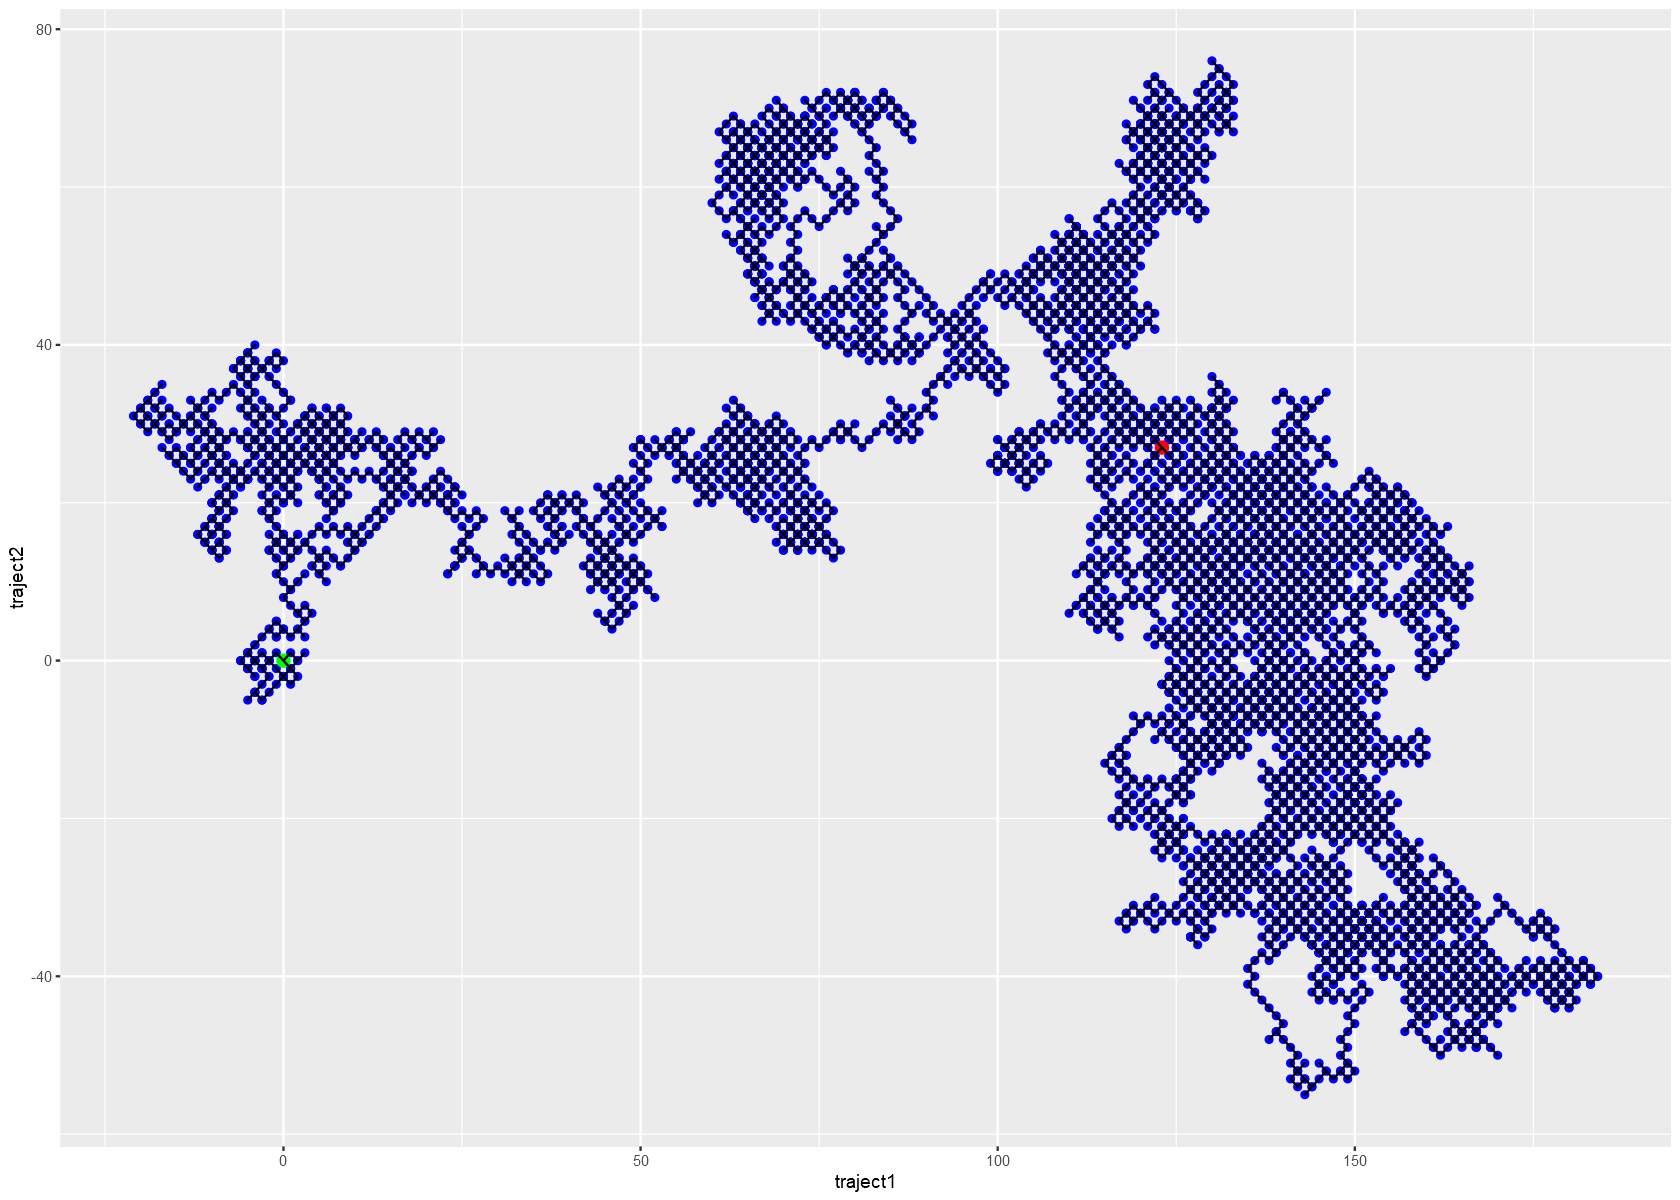

In [64]:
options(repr.plot.width=14, repr.plot.height=10)
p3 <- randomWalk2d_plot(df, n.pasos)
p3